In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches

In [2]:
bbox_fiji = gpd.read_file("bbox_fiji.geojson").to_crs("EPSG:32760").fillna(0)
fiji = gpd.read_file("fiji-land.geojson").to_crs("EPSG:32760").fillna(0)
ibtracs_fiji = gpd.read_file("IBTrACS_Fiji_EEZ.geojson").to_crs("EPSG:32760").fillna(0)
fiji_eez = gpd.read_file("Fiji_EEZ.geojson").to_crs("EPSG:32760").fillna(0)

/tmp/ipykernel_451/3513402822.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bbox_fiji = gpd.read_file("bbox_fiji.geojson").to_crs("EPSG:32760").fillna(0)
/tmp/ipykernel_451/3513402822.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ibtracs_fiji = gpd.read_file("IBTrACS_Fiji_EEZ.geojson").to_crs("EPSG:32760").fillna(0)
/tmp/ipykernel_451/3513402822.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the futur

<Axes: >

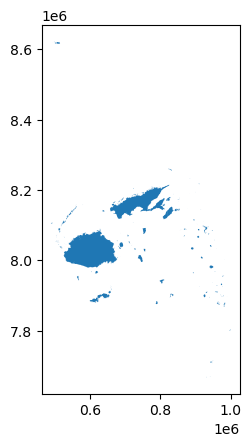

In [3]:
fiji.plot()


<Axes: >

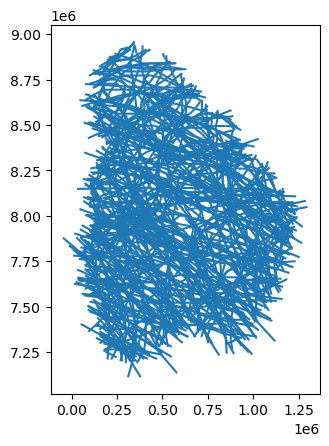

In [4]:
ibtracs_fiji.plot()

<Axes: >

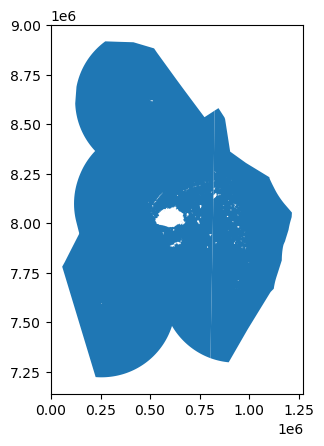

In [5]:
fiji_eez.plot()

/tmp/ipykernel_451/198657524.py:11: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


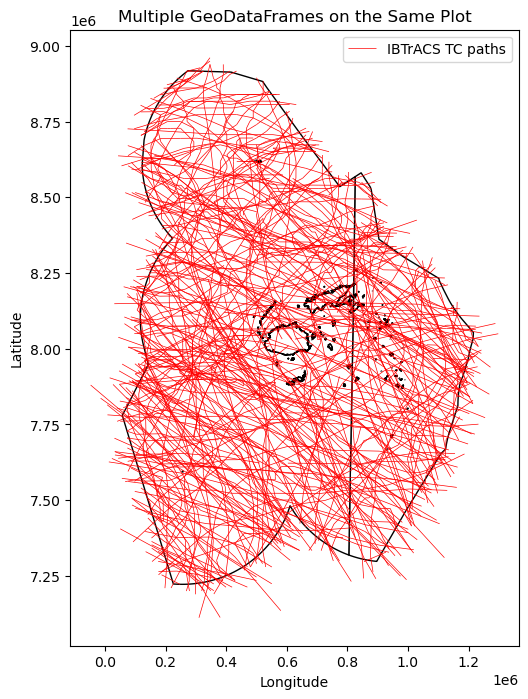

In [6]:
# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the GeoDataFrames on the same axis
ibtracs_fiji.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5, label='IBTrACS TC paths')
fiji_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=1, label='Layer 2')
fiji.plot(ax=ax, color='white', edgecolor='black', linewidth=1, label='Fiji')


# Add a legend
ax.legend()

# Add titles and labels
ax.set_title('Multiple GeoDataFrames on the Same Plot')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [7]:
fiji_eez

MRGID                         GEONAME  MRGID_TER1 POL_TYPE  MRGID_SOV1  \
0   8325  Fijian Exclusive Economic Zone        2108    200NM        2108   

  TERRITORY1 ISO_TER1 SOVEREIGN1  MRGID_TER2  MRGID_SOV2  ...  ISO_SOV1  \
0       Fiji      FJI       Fiji           0           0  ...       FJI   

   ISO_SOV2  ISO_SOV3  UN_SOV1  UN_SOV2  UN_SOV3  UN_TER1  UN_TER2  UN_TER3  \
0         0         0      242        0        0      242        0        0   

                                            geometry  
0  MULTIPOLYGON (((976567.7 8309368.319, 978073.8...  

[1 rows x 32 columns]

                                                                         geometry  \
GEONAME                                                                             
Fijian Exclusive Economic Zone  POLYGON ((978073.84 8308286.706, 979579.993 83...   

                                MRGID  MRGID_TER1 POL_TYPE  MRGID_SOV1  \
GEONAME                                                                  
Fijian Exclusive Economic Zone   8325        2108    200NM        2108   

                               TERRITORY1 ISO_TER1 SOVEREIGN1  MRGID_TER2  \
GEONAME                                                                     
Fijian Exclusive Economic Zone       Fiji      FJI       Fiji           0   

                                MRGID_SOV2  ...  AREA_KM2  ISO_SOV1  ISO_SOV2  \
GEONAME                                     ...                                 
Fijian Exclusive Economic Zone           0  ...   1302114       FJI         0   

                                ISO_SOV3  UN_

<Axes: >

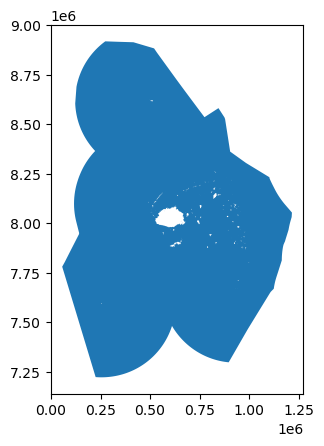

In [8]:
# Dissolve by a column (e.g., 'region')
gdf_dissolved = fiji_eez.dissolve(by='GEONAME')

# View the result
print(gdf_dissolved)

# Plot the dissolved GeoDataFrame
gdf_dissolved.plot()

/tmp/ipykernel_451/3727500016.py:11: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


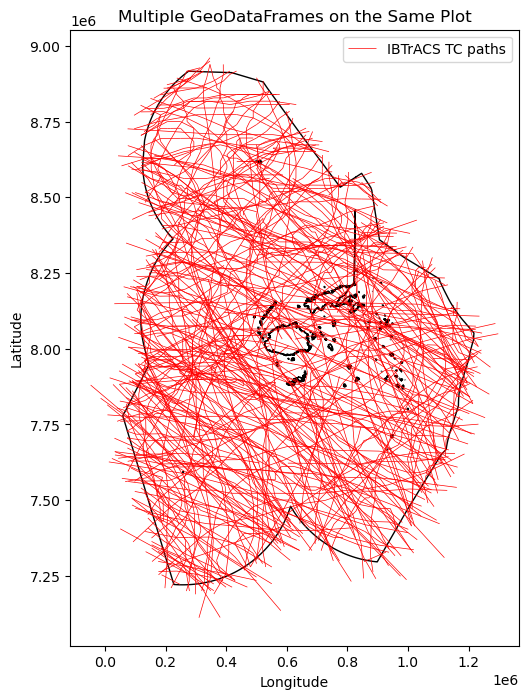

In [9]:
# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the GeoDataFrames on the same axis
ibtracs_fiji.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5, label='IBTrACS TC paths')
gdf_dissolved.plot(ax=ax, color='white', edgecolor='black', linewidth=1, label='Layer 2')
fiji.plot(ax=ax, color='white', edgecolor='black', linewidth=1, label='Fiji')


# Add a legend
ax.legend()

# Add titles and labels
ax.set_title('Multiple GeoDataFrames on the Same Plot')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [10]:
gdf_dissolved.to_file("eez_dissolved.geojson")

In [11]:
gdf_eez = gpd.read_file("figure_eez.geojson")

/tmp/ipykernel_451/158674246.py:11: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


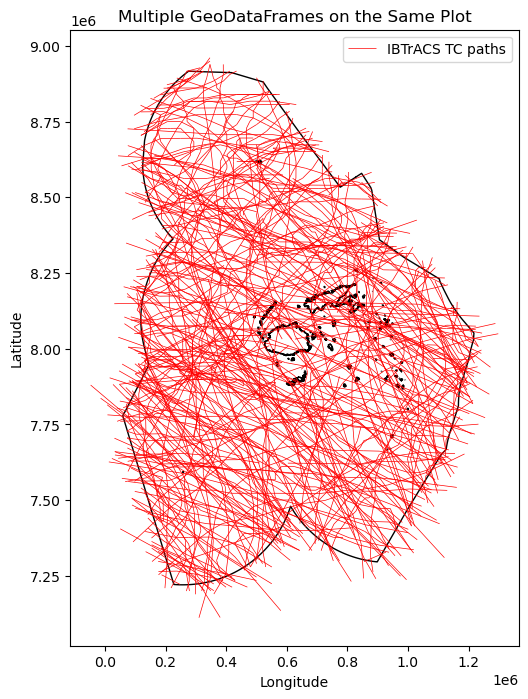

In [12]:
# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the GeoDataFrames on the same axis
ibtracs_fiji.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5, label='IBTrACS TC paths')
gdf_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=1, label='Layer 2')
fiji.plot(ax=ax, color='white', edgecolor='black', linewidth=1, label='Fiji')


# Add a legend
ax.legend()

# Add titles and labels
ax.set_title('Multiple GeoDataFrames on the Same Plot')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

/tmp/ipykernel_451/3102900337.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Fiji Exclusive Economic Zone (EEZ) Boundary')


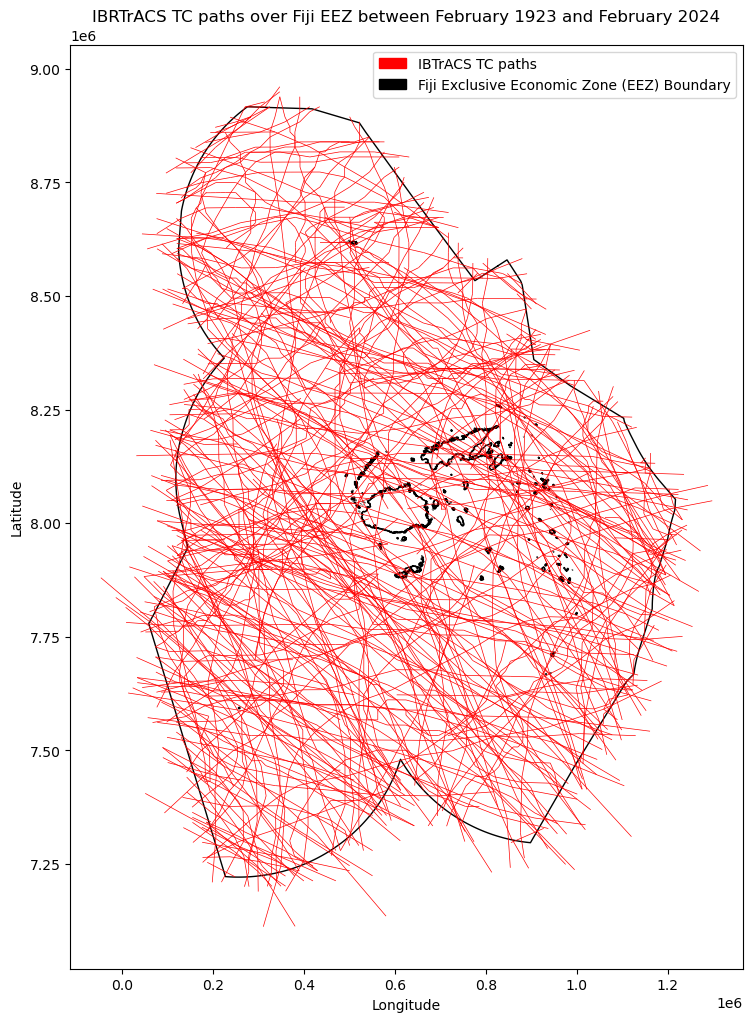

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(14, 12))

# Plot the GeoDataFrames on the same axis
ibtracs_fiji.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)
gdf_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=1)
fiji.plot(ax=ax, color='white', edgecolor='black', linewidth=1)

# Manually create legend handles
ibtracs_fiji_patch = mpatches.Patch(color='red', label='IBTrACS TC paths')
gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Fiji Exclusive Economic Zone (EEZ) Boundary')
# fiji_patch = mpatches.Patch(color='white', edgecolor='black', label='Fiji')

# Add a legend with the custom handles
ax.legend(handles=[ibtracs_fiji_patch, gdf_eez_patch])

# Add titles and labels
ax.set_title('IBRTrACS TC paths over Fiji EEZ between February 1923 and February 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

/tmp/ipykernel_451/2793282846.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Fiji Exclusive Economic Zone (EEZ) Boundary')


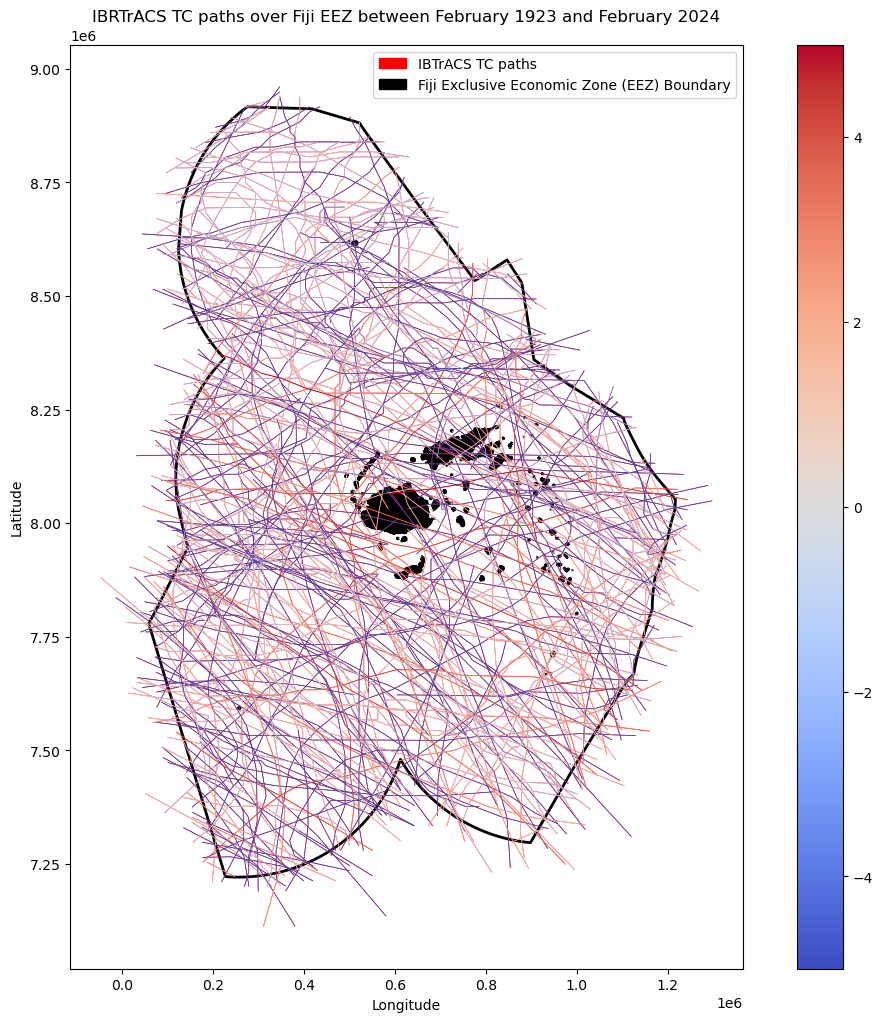

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(14, 12))

# Plot the GeoDataFrames on the same axis
ibtracs_fiji.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)
gdf_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2)
fiji.plot(ax=ax, color='black', edgecolor='black', linewidth=1)

# Manually create legend handles
ibtracs_fiji_patch = mpatches.Patch(color='red', label='IBTrACS TC paths')
gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Fiji Exclusive Economic Zone (EEZ) Boundary')
# fiji_patch = mpatches.Patch(color='white', edgecolor='black', label='Fiji')

# gdf.plot(ax=ax, transform=ccrs.PlateCarree(), column='your_column_name', legend=True, cmap='viridis')
ibtracs_fiji.plot(ax=ax, column='USA_SSHS', legend=True, cmap='coolwarm', linewidth=0.5)

# Add a legend with the custom handles
ax.legend(handles=[ibtracs_fiji_patch, gdf_eez_patch])

# Add titles and labels
ax.set_title('IBRTrACS TC paths over Fiji EEZ between February 1923 and February 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [15]:
bbox_vanuatu = gpd.read_file("bbox_vanuatu.geojson").to_crs("EPSG:3832").fillna(0)
vanuatu = gpd.read_file("vanuatu-land.geojson").to_crs("EPSG:3832").fillna(0)
ibtracs_vanuatu = gpd.read_file("IBTrACS_Vanuatu_EEZ.geojson").to_crs("EPSG:3832").fillna(0)
vanuatu_eez = gpd.read_file("Vanuatu_EEZ.geojson").to_crs("EPSG:3832").fillna(0)

/tmp/ipykernel_451/4211773393.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bbox_vanuatu = gpd.read_file("bbox_vanuatu.geojson").to_crs("EPSG:3832").fillna(0)
/tmp/ipykernel_451/4211773393.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ibtracs_vanuatu = gpd.read_file("IBTrACS_Vanuatu_EEZ.geojson").to_crs("EPSG:3832").fillna(0)
/tmp/ipykernel_451/4211773393.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to

<Axes: >

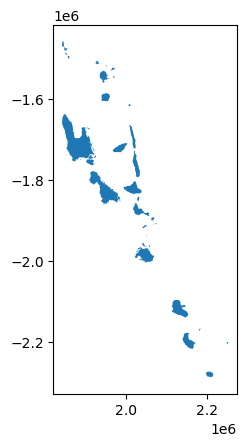

In [16]:
vanuatu.plot()

<Axes: >

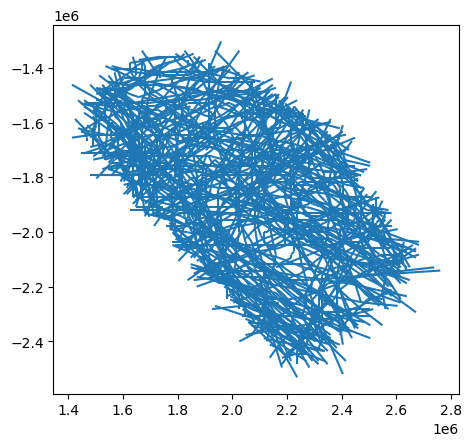

In [17]:
ibtracs_vanuatu.plot()

<Axes: >

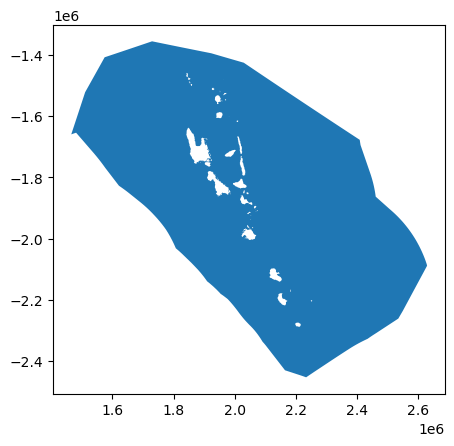

In [18]:
vanuatu_eez.plot()

/tmp/ipykernel_451/3419684123.py:11: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


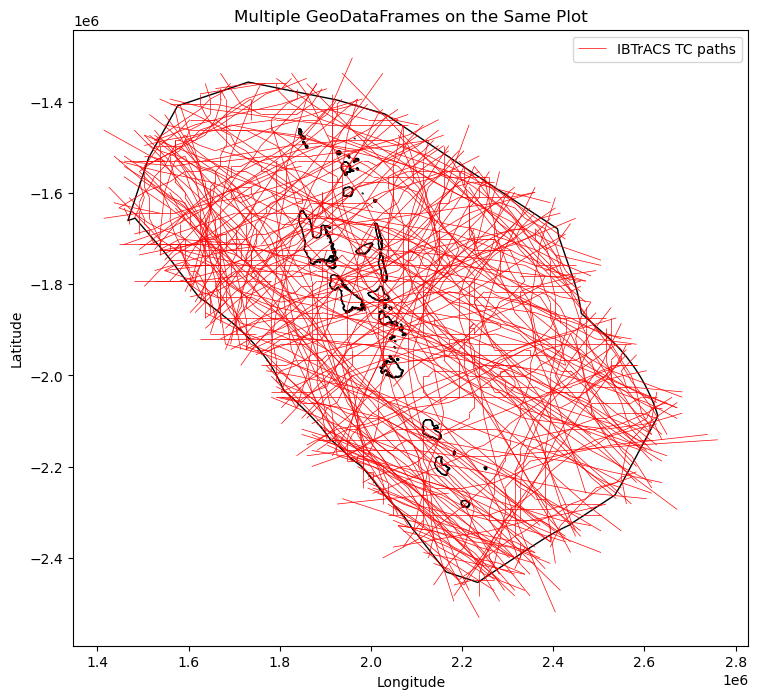

In [19]:
# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the GeoDataFrames on the same axis
ibtracs_vanuatu.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5, label='IBTrACS TC paths')
vanuatu_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=1, label='Layer 2')
vanuatu.plot(ax=ax, color='white', edgecolor='black', linewidth=1, label='Fiji')


# Add a legend
ax.legend()

# Add titles and labels
ax.set_title('Multiple GeoDataFrames on the Same Plot')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

/tmp/ipykernel_451/2793075155.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')


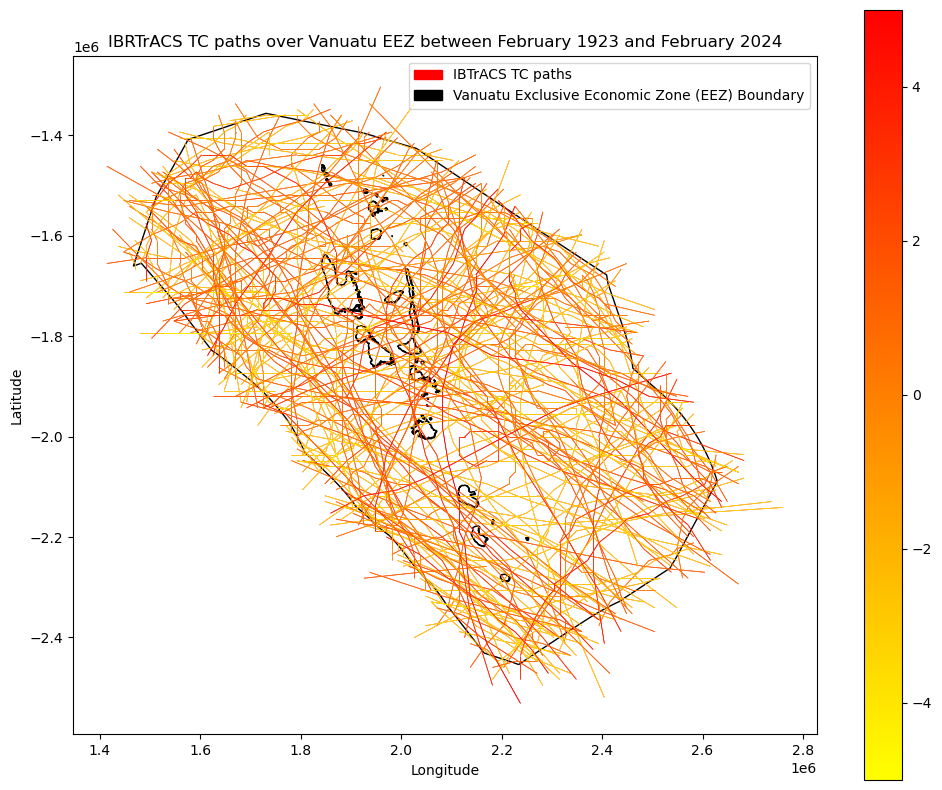

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the GeoDataFrames on the same axis
ibtracs_vanuatu.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)
vanuatu_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=1)
vanuatu.plot(ax=ax, color='white', edgecolor='black', linewidth=1)

# Manually create legend handles
ibtracs_vanuatu_patch = mpatches.Patch(color='red', label='IBTrACS TC paths (February 1923 to February 2024)')
gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')
# fiji_patch = mpatches.Patch(color='white', edgecolor='black', label='Fiji')

# gdf.plot(ax=ax, transform=ccrs.PlateCarree(), column='your_column_name', legend=True, cmap='viridis')
ibtracs_vanuatu.plot(ax=ax, column='USA_SSHS', legend=True, cmap='autumn_r', linewidth=0.5)


# Add a legend with the custom handles
ax.legend(handles=[ibtracs_fiji_patch, gdf_eez_patch])

# Add titles and labels
ax.set_title('IBRTrACS TC paths over Vanuatu EEZ between February 1923 and February 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

/tmp/ipykernel_451/4112131594.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')


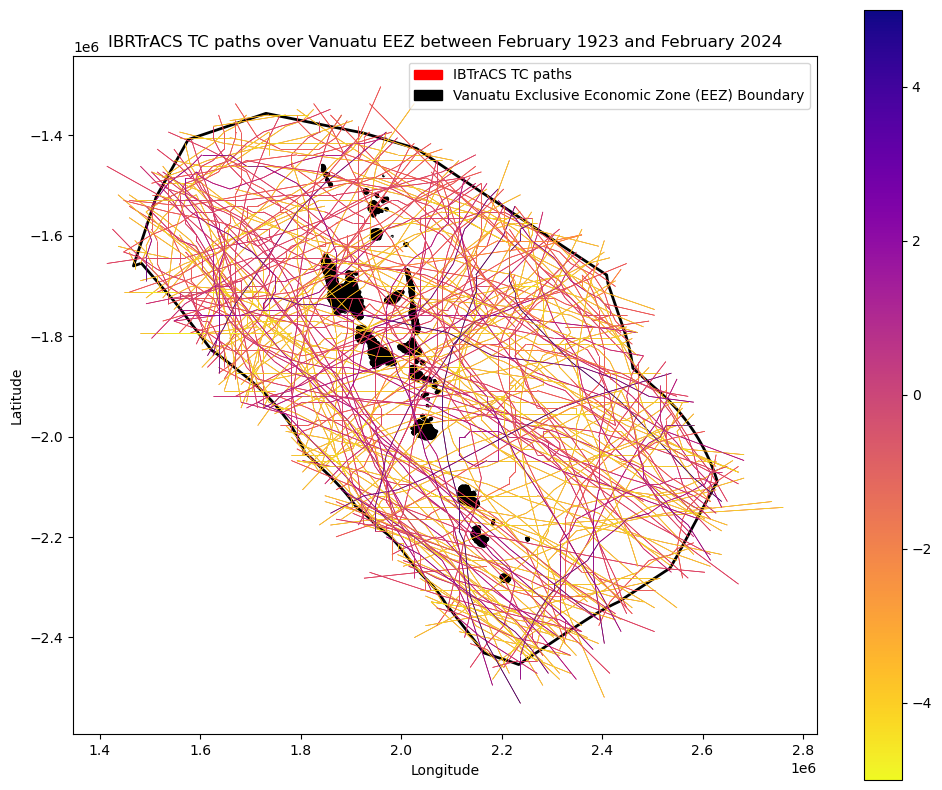

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the GeoDataFrames on the same axis
ibtracs_vanuatu.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)
vanuatu_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2)
vanuatu.plot(ax=ax, color='black', edgecolor='black', linewidth=1)

# Manually create legend handles
ibtracs_vanuatu_patch = mpatches.Patch(color='red', label='IBTrACS TC paths (February 1923 to February 2024)')
gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')
# fiji_patch = mpatches.Patch(color='white', edgecolor='black', label='Fiji')

# gdf.plot(ax=ax, transform=ccrs.PlateCarree(), column='your_column_name', legend=True, cmap='viridis')
ibtracs_vanuatu.plot(ax=ax, column='USA_SSHS', legend=True, cmap='plasma_r', linewidth=0.5)


# Add a legend with the custom handles
ax.legend(handles=[ibtracs_fiji_patch, gdf_eez_patch])

# Add titles and labels
ax.set_title('IBRTrACS TC paths over Vanuatu EEZ between February 1923 and February 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

/tmp/ipykernel_451/1730653190.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')


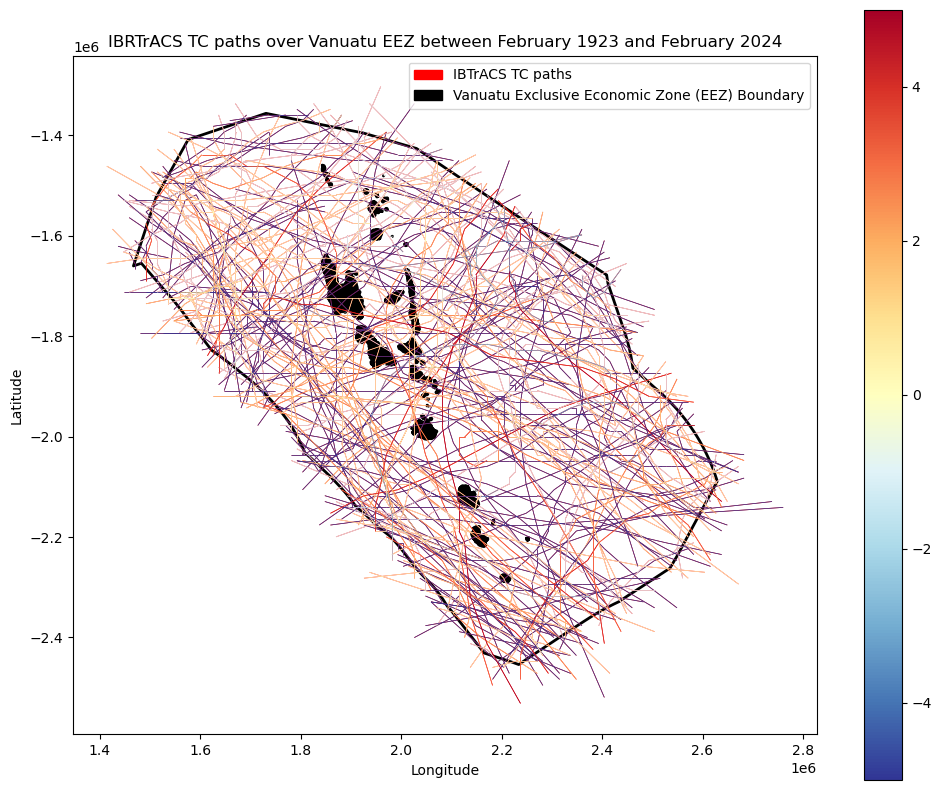

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the GeoDataFrames on the same axis
ibtracs_vanuatu.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)
vanuatu_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2)
vanuatu.plot(ax=ax, color='black', edgecolor='black', linewidth=1)

# Manually create legend handles
ibtracs_vanuatu_patch = mpatches.Patch(color='red', label='IBTrACS TC paths (February 1923 to February 2024)')
gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')
# fiji_patch = mpatches.Patch(color='white', edgecolor='black', label='Fiji')

# gdf.plot(ax=ax, transform=ccrs.PlateCarree(), column='your_column_name', legend=True, cmap='viridis')
ibtracs_vanuatu.plot(ax=ax, column='USA_SSHS', legend=True, cmap='RdYlBu_r', linewidth=0.5)


# Add a legend with the custom handles
ax.legend(handles=[ibtracs_fiji_patch, gdf_eez_patch])

# Add titles and labels
ax.set_title('IBRTrACS TC paths over Vanuatu EEZ between February 1923 and February 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

/tmp/ipykernel_451/2708753823.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')


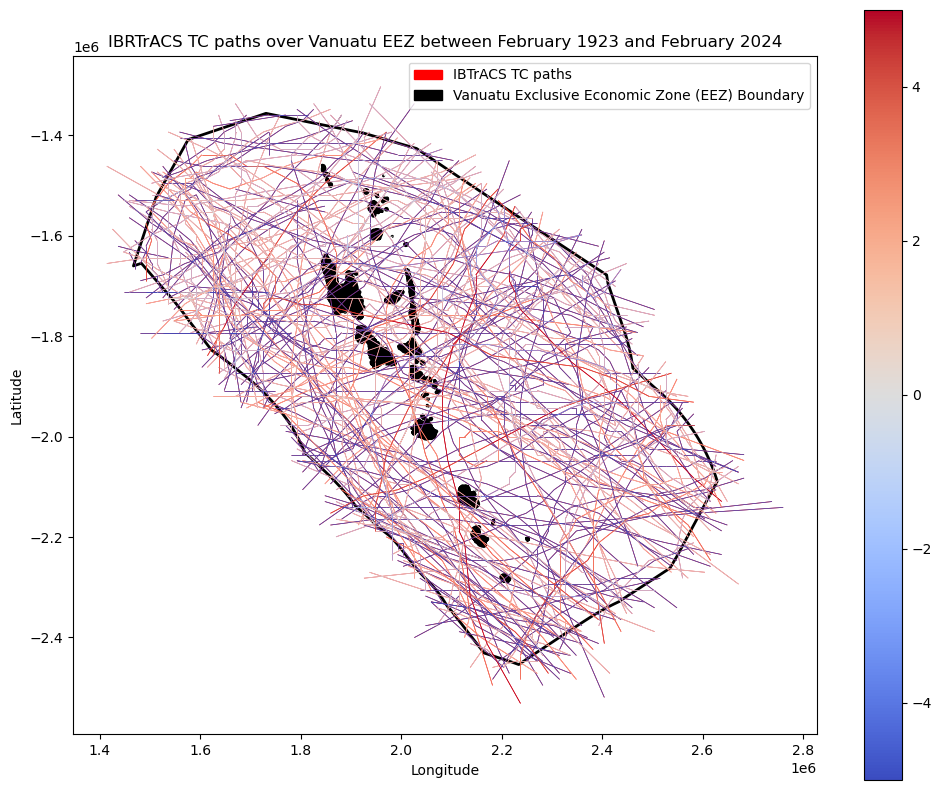

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the GeoDataFrames on the same axis
ibtracs_vanuatu.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)
vanuatu_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2)
vanuatu.plot(ax=ax, color='black', edgecolor='black', linewidth=1)

# Manually create legend handles
ibtracs_vanuatu_patch = mpatches.Patch(color='red', label='IBTrACS TC paths (February 1923 to February 2024)')
gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')
# fiji_patch = mpatches.Patch(color='white', edgecolor='black', label='Fiji')

# gdf.plot(ax=ax, transform=ccrs.PlateCarree(), column='your_column_name', legend=True, cmap='viridis')
ibtracs_vanuatu.plot(ax=ax, column='USA_SSHS', legend=True, cmap='coolwarm', linewidth=0.5)


# Add a legend with the custom handles
ax.legend(handles=[ibtracs_fiji_patch, gdf_eez_patch])

# Add titles and labels
ax.set_title('IBRTrACS TC paths over Vanuatu EEZ between February 1923 and February 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [24]:
sss_categories = ibtracs_vanuatu['USA_SSHS'].unique()
print(sss_categories)

bom_categories = ibtracs_vanuatu['BOM_TYPE'].unique()
print(bom_categories)

[-5 -1  0  1  2  3  4  5 -3 -2]
[ 0. 30. 40. 20.]


In [25]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches

# # Create a matplotlib figure and axis
# fig, ax = plt.subplots(figsize=(12, 10))

# # Plot the GeoDataFrames on the same axis
# ibtracs_vanuatu.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)
# vanuatu_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2)
# vanuatu.plot(ax=ax, color='black', edgecolor='black', linewidth=1)

# # Manually create legend handles

# # Plot the ibtracs_vanuatu GeoDataFrame with different colors based on the 'USA_SSHS' column
# # Assuming 'USA_SSHS' column has integers representing different categories
# categories = ibtracs_vanuatu['USA_SSHS'].unique()
# colors = ['maroon', 'firebrick', 'indianred', 'lightcoral', 'palevioletred', 'mediumvioletred', 'mediumpurple', 'indigo', 'navy']  # Define colors for each category

# or category, color in zip(categories, colors):
#     subset = ibtracs_vanuatu[ibtracs_vanuatu['USA_SSHS'] == category]
#     subset.plot(ax=ax, color=color, linewidth=0.5, label=f'Category {category}')

# # Manually create legend handles
# legend_handles = [mpatches.Patch(color=color, label=f'Category {category}') for category, color in zip(categories, colors)]
# gdf_eez_patch = mpatches.Patch(color='none', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')
# vanuatu_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu')

# # Add the custom legend handles
# ax.legend(handles=legend_handles + [gdf_eez_patch, vanuatu_patch])

# # Add titles and labels
# ax.set_title('IBTrACS TC paths over Vanuatu EEZ between February 1923 and February 2024')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')

# # Show the plot
# plt.show()

# # ibtracs_vanuatu_patch = mpatches.Patch(color='red', label='IBTrACS TC paths (February 1923 to February 2024)')
# # gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')
# # fiji_patch = mpatches.Patch(color='white', edgecolor='black', label='Fiji')

# # gdf.plot(ax=ax, transform=ccrs.PlateCarree(), column='your_column_name', legend=True, cmap='viridis')
# ibtracs_vanuatu.plot(ax=ax, column='USA_SSHS', legend=False, cmap='coolwarm', linewidth=0.5)


# # Add a legend with the custom handles
# ax.legend(handles=[ibtracs_fiji_patch, gdf_eez_patch])

# # Add titles and labels
# ax.set_title('IBRTrACS TC paths over Vanuatu EEZ between February 1923 and February 2024')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')

# # Show the plot
# plt.show()

/tmp/ipykernel_451/972284701.py:20: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  subset.plot(ax=ax, color=color, linewidth=0.5, label=f'Category {category}')
/tmp/ipykernel_451/972284701.py:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  gdf_eez_patch = mpatches.Patch(color='none', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')
/tmp/ipykernel_451/972284701.py:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  vanuatu_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu')


Text(143.82524165711308, 0.5, 'Latitude')

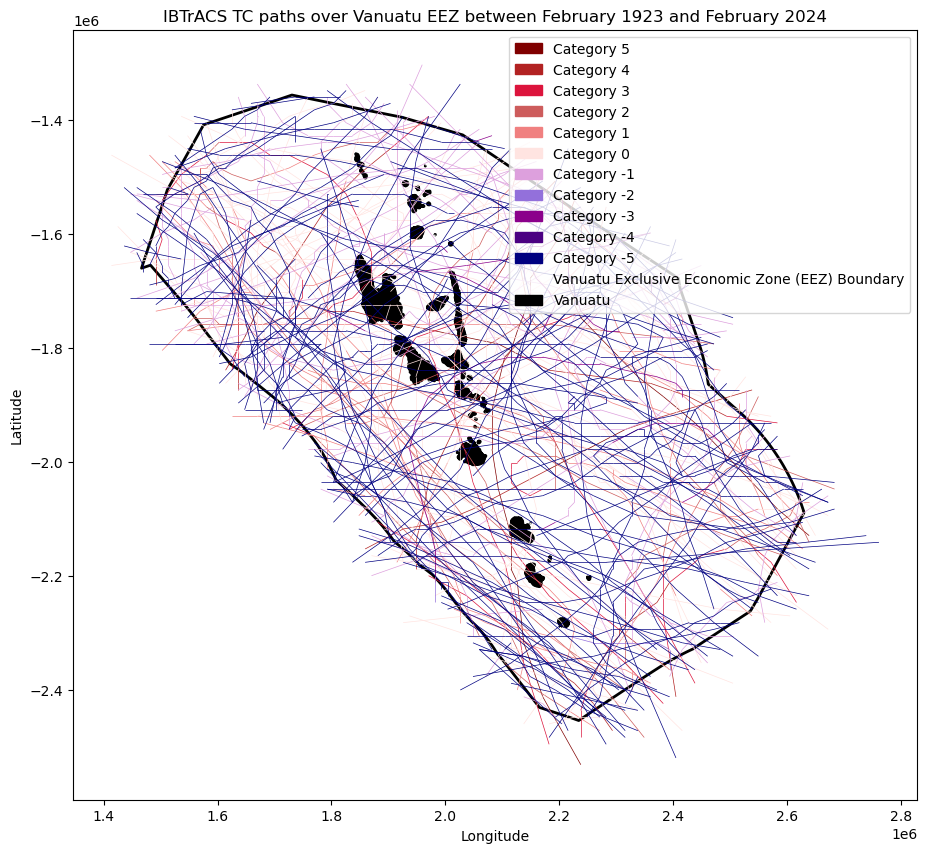

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the GeoDataFrames on the same axis
vanuatu_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2)
vanuatu.plot(ax=ax, color='black', edgecolor='black', linewidth=1)

# Define the order of categories and their corresponding colors
ordered_categories = [5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5]  # Example categories
colors = ['maroon', 'firebrick', 'crimson', 'indianred', 'lightcoral', 'mistyrose', 'plum', 'mediumpurple', 'darkmagenta', 'indigo', 'navy']  # Define colors for each category

# Plot the ibtracs_vanuatu GeoDataFrame with different colors based on the 'USA_SSHS' column
# Assuming 'USA_SSHS' column has integers representing different categories
for category, color in zip(ordered_categories, colors):
    subset = ibtracs_vanuatu[ibtracs_vanuatu['USA_SSHS'] == category]
    subset.plot(ax=ax, color=color, linewidth=0.5, label=f'Category {category}')

# Manually create legend handles in the desired order
legend_handles = [mpatches.Patch(color=color, label=f'Category {category}') for category, color in zip(ordered_categories, colors)]
gdf_eez_patch = mpatches.Patch(color='none', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')
vanuatu_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu')

# Specify the order of handles in the legend
ordered_handles = legend_handles + [gdf_eez_patch, vanuatu_patch]

# Add the custom legend handles in the specified order
ax.legend(handles=ordered_handles)

# Add titles and labels
ax.set_title('IBTrACS TC paths over Vanuatu EEZ between February 1923 and February 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
# plt.show()


# # Plot the ibtracs_vanuatu GeoDataFrame with different colors based on the 'USA_SSHS' column
# # Assuming 'USA_SSHS' column has integers representing different categories

# # categories = ibtracs_vanuatu['USA_SSHS'].unique()
# # colors = ['maroon', 'firebrick', 'indianred', 'lightcoral', 'palevioletred', 'mediumvioletred', 'mediumpurple', 'indigo', 'navy']  # Define colors for each category

# for category, color in zip(categories, colors):
#     subset = ibtracs_vanuatu[ibtracs_vanuatu['USA_SSHS'] == category]
#     subset.plot(ax=ax, color=color, linewidth=0.5, label=f'Category {category}')

# # Manually create legend handles
# legend_handles = [mpatches.Patch(color=color, label=f'Category {category}') for category, color in zip(categories, colors)]
# gdf_eez_patch = mpatches.Patch(color='none', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')
# vanuatu_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu')

# # Add the custom legend handles
# ax.legend(handles=legend_handles + [gdf_eez_patch, vanuatu_patch])

# # Add titles and labels
# ax.set_title('IBTrACS TC paths over Vanuatu EEZ between February 1923 and February 2024')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')

# # Show the plot
# plt.show()

In [27]:
nad_categories = ibtracs_vanuatu['NAD_CAT'].unique()
print(nad_categories)
# bom_categories = ibtracs_vanuatu['BOM_TYPE'].unique()
# print(bom_categories)

[ 0. -1.  1.  4.  3.  2.  5.]


/tmp/ipykernel_451/2497787907.py:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  vanuatu_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu')


Text(143.82524165711308, 0.5, 'Latitude')

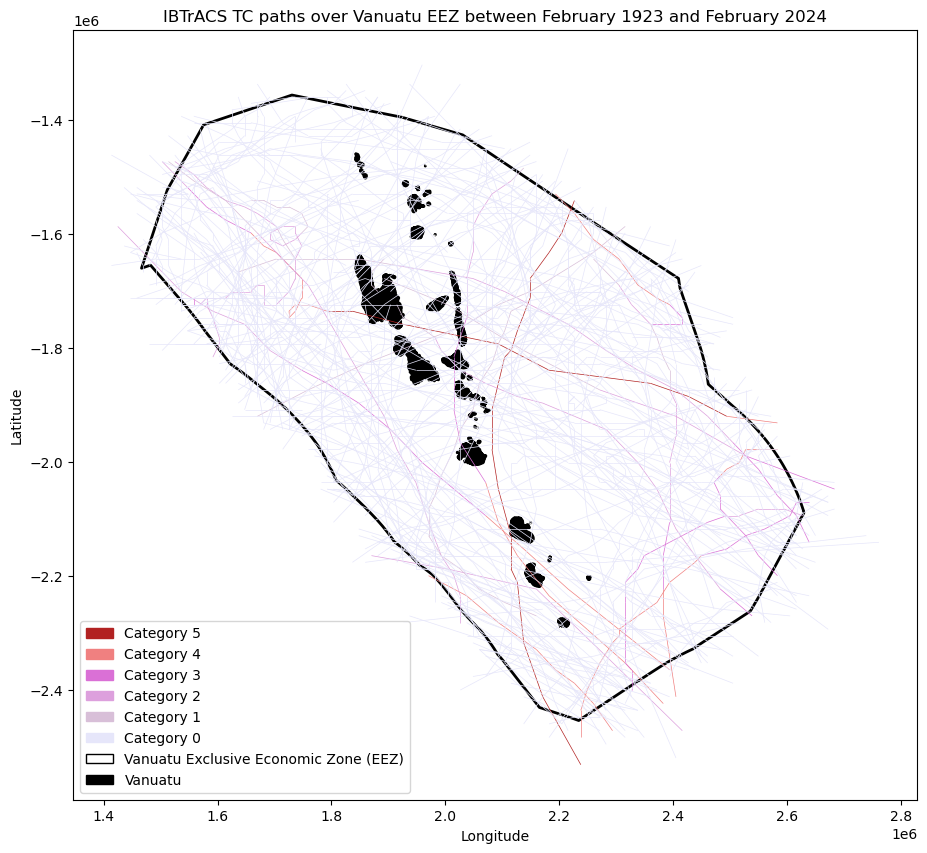

In [28]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the GeoDataFrames on the same axis
vanuatu_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2)
vanuatu.plot(ax=ax, color='black', edgecolor='black', linewidth=1)

# Define the order of categories and their corresponding colors
ordered_categories = [5, 4, 3, 2, 1, 0]  # Example categories
colors = ['firebrick', 'lightcoral', 'orchid', 'plum', 'thistle', 'lavender']  # Define colors for each category

# Plot the ibtracs_vanuatu GeoDataFrame with different colors based on the 'USA_SSHS' column
# Assuming 'USA_SSHS' column has integers representing different categories
for category, color in zip(ordered_categories, colors):
    subset = ibtracs_vanuatu[ibtracs_vanuatu['NAD_CAT'] == category]
    subset.plot(ax=ax, color=color, linewidth=0.5, label=f'Category {category}')

# Manually create legend handles in the desired order
legend_handles = [mpatches.Patch(color=color, label=f'Category {category}') for category, color in zip(ordered_categories, colors)]
gdf_eez_patch = mpatches.Patch(facecolor='white', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ)')
vanuatu_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu')

# Specify the order of handles in the legend
ordered_handles = legend_handles + [gdf_eez_patch, vanuatu_patch]

# Add the custom legend handles in the specified order
ax.legend(handles=ordered_handles, loc='lower left')

# Add titles and labels
ax.set_title('IBTrACS TC paths over Vanuatu EEZ between February 1923 and February 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')



/tmp/ipykernel_451/2497787907.py:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  vanuatu_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu')


Text(143.82524165711308, 0.5, 'Latitude')

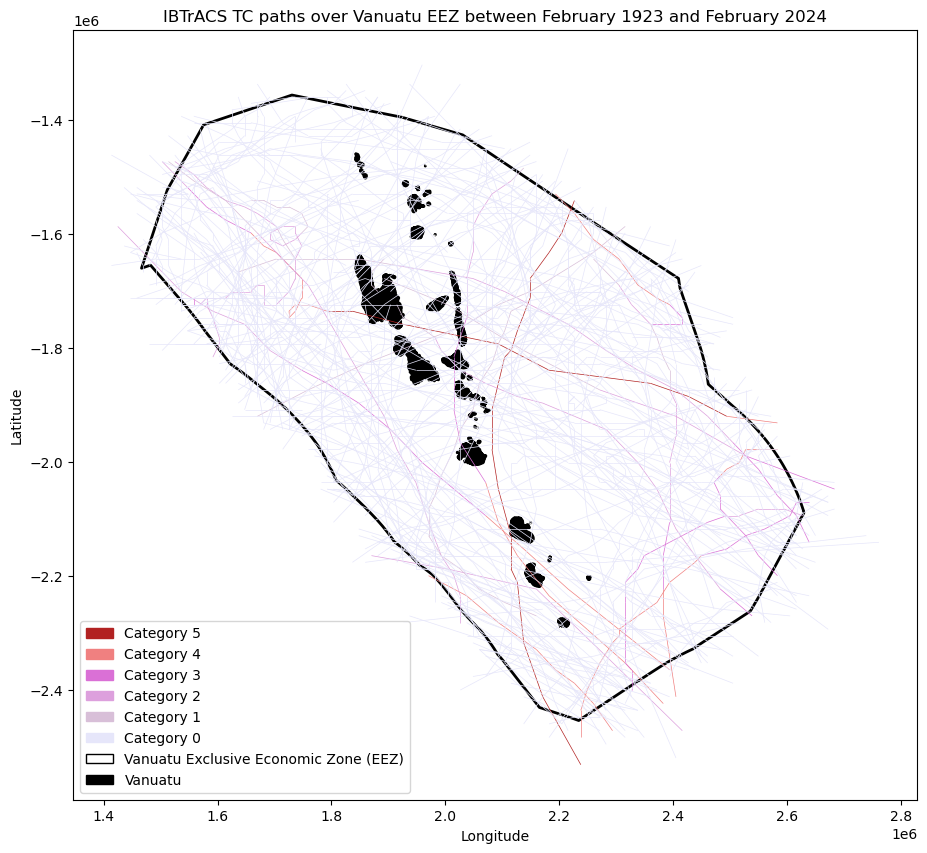

In [64]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the GeoDataFrames on the same axis
vanuatu_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2)
vanuatu.plot(ax=ax, color='black', edgecolor='black', linewidth=1)

# Define the order of categories and their corresponding colors
ordered_categories = [5, 4, 3, 2, 1, 0]  # Example categories
colors = ['firebrick', 'lightcoral', 'orchid', 'plum', 'thistle', 'lavender']  # Define colors for each category

# Plot the ibtracs_vanuatu GeoDataFrame with different colors based on the 'USA_SSHS' column
# Assuming 'USA_SSHS' column has integers representing different categories
for category, color in zip(ordered_categories, colors):
    subset = ibtracs_vanuatu[ibtracs_vanuatu['NAD_CAT'] == category]
    subset.plot(ax=ax, color=color, linewidth=0.5, label=f'Category {category}')

# Manually create legend handles in the desired order
legend_handles = [mpatches.Patch(color=color, label=f'Category {category}') for category, color in zip(ordered_categories, colors)]
gdf_eez_patch = mpatches.Patch(facecolor='white', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ)')
vanuatu_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu')

# Specify the order of handles in the legend
ordered_handles = legend_handles + [gdf_eez_patch, vanuatu_patch]

# Add the custom legend handles in the specified order
ax.legend(handles=ordered_handles, loc='lower left')

# Add titles and labels
ax.set_title('IBTrACS TC paths over Vanuatu EEZ between February 1923 and February 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')



In [29]:
unique_value_counts = ibtracs_vanuatu['NAD_CAT'].value_counts()
print(unique_value_counts)

NAD_CAT
 0.0    2952
-1.0     230
 2.0     103
 3.0      65
 1.0      58
 4.0      57
 5.0      30
Name: count, dtype: int64


In [37]:
ibtracs = unique_value_counts = ibtracs_fiji['NAD_CAT'].value_counts()
print(unique_value_counts)

NAD_CAT
 0.0    3653
-1.0     426
 1.0     135
 2.0     118
 3.0      97
 4.0      41
 5.0      34
Name: count, dtype: int64


In [45]:
fiji_value_counts = ibtracs_fiji['NAME'].value_counts()
print(fiji_value_counts)

NAME
UNNAMED    1688
JUNE         69
MARK         63
RAE          63
SARAH        59
           ... 
JAN           2
FILI          2
BETI          1
CHARLES       1
RENE          1
Name: count, Length: 133, dtype: int64


In [44]:
tcs_vanuatu_counts = ibtracs_vanuatu['NAME'].value_counts()
print(tcs_vanuatu_counts)

NAME
UNNAMED      998
OMA           66
ATU           58
YALI          57
DOVI          56
            ... 
ANA            2
STAN           2
JULIETTE       1
CHARLOTTE      1
YASA           1
Name: count, Length: 129, dtype: int64


In [30]:
print(subset.columns)

Index(['SID', 'SEASON', 'NUMBER', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME',
       'NATURE', 'LAT', 'LON',
       ...
       'USA_SEA_SW', 'USA_SEA_NW', 'STORM_SPD', 'STORM_DR', 'year', 'month',
       'day', 'hour', 'min', 'geometry'],
      dtype='object', length=180)


In [56]:
#Spatial join them and keep the fields BK_left, BK_right
land_tcs_vanuatu = gpd.sjoin(left_df=ibtracs_vanuatu, right_df=vanuatu, how="inner", predicate="intersects")#[[f"{matchfield}_left", f"{matchfield}_right"]]
land_tcs_fiji = gpd.sjoin(left_df=ibtracs_fiji, right_df=fiji, how="inner", predicate="intersects")#[[f"{matchfield}_left", f"{matchfield}_right"]]

In [60]:
len(land_tcs_vanuatu['NAME'].value_counts())

62

In [59]:
len(land_tcs_fiji['NAME'].value_counts())

47

In [31]:
# # Set the display option to show all columns
# subset.set_option('display.max_columns', None)

# # Print the columns of the DataFrame
# print(subset.columns)

In [32]:
print(ibtracs_fiji.columns.unique())


Index(['SID', 'SEASON', 'NUMBER', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME',
       'NATURE', 'LAT', 'LON',
       ...
       'USA_SEA_SW', 'USA_SEA_NW', 'STORM_SPD', 'STORM_DR', 'year', 'month',
       'day', 'hour', 'min', 'geometry'],
      dtype='object', length=180)


In [33]:
print(ibtracs_fiji.columns)

Index(['SID', 'SEASON', 'NUMBER', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME',
       'NATURE', 'LAT', 'LON',
       ...
       'USA_SEA_SW', 'USA_SEA_NW', 'STORM_SPD', 'STORM_DR', 'year', 'month',
       'day', 'hour', 'min', 'geometry'],
      dtype='object', length=180)


In [34]:
print(", ".join(ibtracs_fiji.columns))

SID, SEASON, NUMBER, BASIN, SUBBASIN, NAME, ISO_TIME, NATURE, LAT, LON, WMO_WIND, WMO_PRES, WMO_AGENCY, TRACK_TYPE, DIST2LAND, LANDFALL, IFLAG, USA_AGENCY, USA_ATCFID, USA_LAT, USA_LON, USA_RECORD, USA_STATUS, USA_WIND, USA_PRES, USA_SSHS, USA_R34_NE, USA_R34_SE, USA_R34_SW, USA_R34_NW, USA_R50_NE, USA_R50_SE, USA_R50_SW, USA_R50_NW, USA_R64_NE, USA_R64_SE, USA_R64_SW, USA_R64_NW, USA_POCI, USA_ROCI, USA_RMW, USA_EYE, TOK_LAT, TOK_LON, TOK_GRADE, TOK_WIND, TOK_PRES, TOK_R50_DR, TOK_R50_L, TOK_R50_S, TOK_R30_DR, TOK_R30_L, TOK_R30_S, TOK_LAND, CMA_LAT, CMA_LON, CMA_CAT, CMA_WIND, CMA_PRES, HKO_LAT, HKO_LON, HKO_CAT, HKO_WIND, HKO_PRES, KMA_LAT, KMA_LON, KMA_CAT, KMA_WIND, KMA_PRES, KMA_R50_DR, KMA_R50_L, KMA_R50_S, KMA_R30_DR, KMA_R30_L, KMA_R30_S, NEW_LAT, NEW_LON, NEW_GRADE, NEW_WIND, NEW_PRES, NEW_CI, NEW_DP, NEW_POCI, REU_LAT, REU_LON, REU_TYPE, REU_WIND, REU_PRES, REU_TNUM, REU_CI, REU_RMW, REU_R34_NE, REU_R34_SE, REU_R34_SW, REU_R34_NW, REU_R50_NE, REU_R50_SE, REU_R50_SW, REU_R50_

In [35]:
bbox_fiji = gpd.read_file("bbox_fiji.geojson").to_crs("EPSG:3832").fillna(0)
fiji = gpd.read_file("fiji-land.geojson").to_crs("EPSG:3832").fillna(0)
ibtracs_fiji = gpd.read_file("IBTrACS_Fiji_EEZ.geojson").to_crs("EPSG:3832").fillna(0)
fiji_eez = gpd.read_file("Fiji_EEZ.geojson").to_crs("EPSG:3832").fillna(0)
bbox_vanuatu = gpd.read_file("bbox_vanuatu.geojson").to_crs("EPSG:3832").fillna(0)
vanuatu = gpd.read_file("vanuatu-land.geojson").to_crs("EPSG:3832").fillna(0)
ibtracs_vanuatu = gpd.read_file("IBTrACS_Vanuatu_EEZ.geojson").to_crs("EPSG:3832").fillna(0)
vanuatu_eez = gpd.read_file("Vanuatu_EEZ.geojson").to_crs("EPSG:3832").fillna(0)

/tmp/ipykernel_451/2275030040.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bbox_fiji = gpd.read_file("bbox_fiji.geojson").to_crs("EPSG:3832").fillna(0)
/tmp/ipykernel_451/2275030040.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ibtracs_fiji = gpd.read_file("IBTrACS_Fiji_EEZ.geojson").to_crs("EPSG:3832").fillna(0)
/tmp/ipykernel_451/2275030040.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future 

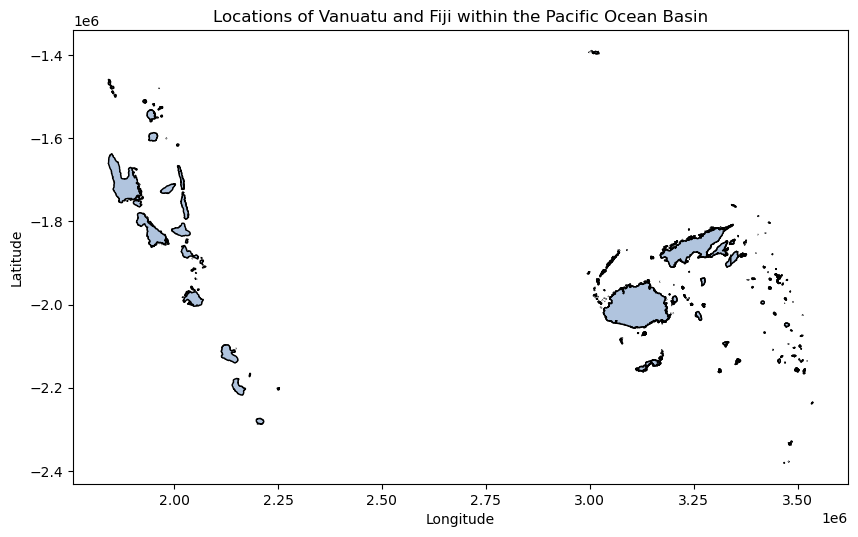

In [36]:
# Create a plot for the first GeoDataFrame and get the axes
ax = fiji.plot(color='blue', edgecolor='black', figsize=(10, 10))

# Plot the additional GeoDataFrames on the same axes
fiji.plot(ax=ax, color='lightsteelblue', edgecolor='black')
vanuatu.plot(ax=ax, color='lightsteelblue', edgecolor='black')

# Customize the plot (optional)
plt.title('Locations of Vanuatu and Fiji within the Pacific Ocean Basin')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()